In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import plotly.express as px

In [2]:
df = pd.read_csv(r"C:\Users\imane\OneDrive\Desktop\home_exchange\HomeExchange\data\HomeExchange_ML.csv")
df.head()

,user_id,nb_year,has_renewed,is_new_user,referral,promotion,payment3x,payement2,payment3,abscence_days,...,exchanges_host,nb_guests_host,nights_host,capacity_host,diff_capacity_host,finalized_host,book_diff_host,exchange_type_host_clean,home_host_clean,residence_host_clean
0,1,1,0,0,0,0,0,0,0,3250,...,32.0,4.0,6.0,8.0,4.0,2.0,56.0,NON_RECIPROCAL,Home,primary
1,9,2,1,0,0,0,0,0,0,365,...,380.0,4.0,5.0,7.0,3.0,8.0,43.0,NON_RECIPROCAL,apartment,primary
2,10,1,1,1,0,0,0,0,0,0,...,53.0,3.0,11.0,12.0,9.0,0.0,121.0,NON_RECIPROCAL,apartment,primary
3,40,1,1,0,0,0,0,0,0,1096,...,4.0,3.0,5.0,5.0,2.0,0.0,104.0,NON_RECIPROCAL,Home,primary
4,67,1,1,1,0,0,0,0,0,0,...,53.0,3.0,8.0,6.0,3.0,1.0,144.0,NON_RECIPROCAL,apartment,primary


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70726 entries, 0 to 70725
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_id                    70726 non-null  int64  
 1   nb_year                    70726 non-null  int64  
 2   has_renewed                70726 non-null  int64  
 3   is_new_user                70726 non-null  int64  
 4   referral                   70726 non-null  int64  
 5   promotion                  70726 non-null  int64  
 6   payment3x                  70726 non-null  int64  
 7   payement2                  70726 non-null  int64  
 8   payment3                   70726 non-null  int64  
 9   abscence_days              70726 non-null  int64  
 10  exchanges_guest            70726 non-null  float64
 11  nb_guests_guest            70726 non-null  float64
 12  nights_guest               70726 non-null  float64
 13  capacity_guest             70726 non-null  flo

In [4]:
df = df.set_index("user_id")

In [5]:
df[["nb_year","is_new_user","abscence_days","exchanges_guest","exchanges_host","has_renewed"]].corr()

,nb_year,is_new_user,abscence_days,exchanges_guest,exchanges_host,has_renewed
nb_year,1.000000,-0.257376,0.087006,0.126829,0.169811,0.239876
is_new_user,-0.257376,1.000000,-0.532440,-0.028843,-0.114187,-0.152245
abscence_days,0.087006,-0.532440,1.000000,-0.035292,0.105317,0.109539
exchanges_guest,0.126829,-0.028843,-0.035292,1.000000,0.428096,0.128619
exchanges_host,0.169811,-0.114187,0.105317,0.428096,1.000000,0.171869
has_renewed,0.239876,-0.152245,0.109539,0.128619,0.171869,1.000000


In [6]:
df["exchange_type_guest_clean"] = df["exchange_type_guest_clean"].astype("string")
df["home_guest_clean"] = df["home_guest_clean"].astype("string")
df["residence_guest_clean"] = df["residence_guest_clean"].astype("string")
df["exchange_type_host_clean"] = df["exchange_type_host_clean"].astype("string")
df["home_host_clean"] = df["home_host_clean"].astype("string")
df["residence_host_clean"] = df["residence_host_clean"].astype("string")

In [7]:
scaler = StandardScaler()
df_num = scaler.fit_transform(df.select_dtypes(include="number"))

In [8]:
df_num = pd.DataFrame(df_num, columns=df.select_dtypes(include="number").columns)

In [19]:
idx = df.index

In [21]:
df_num = df_num.set_index(idx)

In [12]:
df_cat = pd.get_dummies(df.select_dtypes(exclude="number"))

In [24]:
df_ml = df_num.join(df_cat)

In [32]:
inertias = []
nb_k = range(1,10)
for k in nb_k:
    km = KMeans(n_clusters=k, n_init=100)
    km.fit(df_ml)
    inertias.append(km.inertia_)

In [33]:
line = px.line(inertias)
line.show()

In [34]:
km = KMeans(n_clusters=4, n_init=100)
km.fit(df_ml)
km_labels = km.predict(df_ml)

In [36]:
km_labels = pd.DataFrame(km_labels)

<Axes: xlabel='0', ylabel='count'>

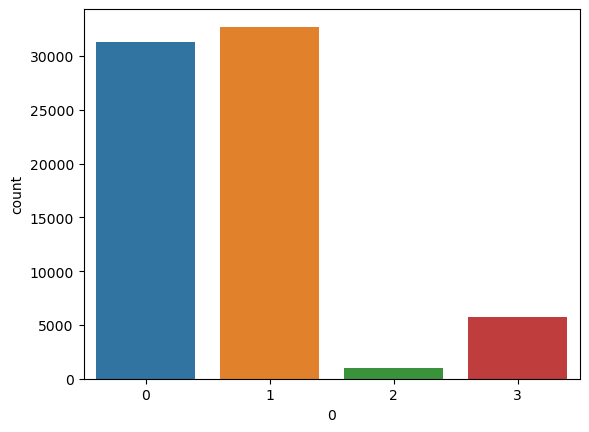

In [39]:
sns.countplot(km_labels, x=km_labels[0])

In [44]:
centroids = km.cluster_centers_

In [48]:
df_centroids = pd.DataFrame(centroids, columns = df_ml.columns)

In [51]:
df_centroids[["nb_year",'has_renewed','is_new_user','abscence_days','exchanges_guest','exchanges_host']]

,nb_year,has_renewed,is_new_user,abscence_days,exchanges_guest,exchanges_host
0,-0.148173,-0.116666,0.368652,-0.350880,0.029541,-0.072384
1,0.194717,0.197852,-0.312008,0.299699,0.060491,0.177966
2,-0.283081,-0.213707,0.654730,-0.457883,0.122553,0.002381
3,-0.255985,-0.458233,-0.342737,0.283024,-0.528906,-0.623083


In [52]:
df_centroids[['nb_guests_guest','nights_guest',"finalized_guest",'nb_guests_host','nights_host','finalized_host']]

,nb_guests_guest,nights_guest,finalized_guest,nb_guests_host,nights_host,finalized_host
0,-0.123445,-0.212898,0.129185,-0.341740,-0.315130,0.152055
1,0.485039,0.463969,0.001347,0.534131,0.447193,-0.032725
2,0.013726,-0.137578,0.054979,-0.040008,-0.177127,0.007594
3,-2.104187,-1.467861,-0.725109,-1.179697,-0.804695,-0.647411
